In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/gurgaon_properties_cleaned_v2.csv')

In [ ]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,bedRoom,bathroom,balcony,floorNum,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,Wardrobe,furnishing_type,luxury_score
0,flat,ashiana apartment,sector 23,0.16,2051.0,780.0,2,2,2,1.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,house,independent,sector 39,1.80,21875.0,823.0,1,1,2,3.0,...,800.0,720.0,0,0,0,0,0,0,0,0
2,house,vipul tatvam villa,sector 48,7.35,22812.0,3222.0,4,5,2,2.0,...,NaN,NaN,1,1,1,1,0,4,1,144
3,flat,mapsko casa bella,sector 82,3.00,6134.0,4891.0,4,6,3+,25.0,...,NaN,NaN,0,1,0,1,0,0,1,119
4,flat,ansal heights 86,sector 86,0.64,4706.0,1360.0,2,2,1,3.0,...,1360.0,NaN,0,0,0,0,0,0,0,73


In [ ]:
df.shape

(3801, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3801 entries, 0 to 3800
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3801 non-null   object 
 1   society              3801 non-null   object 
 2   sector               3801 non-null   object 
 3   price                3784 non-null   float64
 4   price_per_sqft       3784 non-null   float64
 5   area                 3784 non-null   float64
 6   bedRoom              3801 non-null   int64  
 7   bathroom             3801 non-null   int64  
 8   balcony              3801 non-null   object 
 9   floorNum             3784 non-null   float64
 10  facing               3543 non-null   object 
 11  agePossession        3801 non-null   object 
 12  super_built_up_area  2449 non-null   float64
 13  built_up_area        1186 non-null   float64
 14  carpet_area          1943 non-null   float64
 15  study room           3801 non-null   i

In [ ]:
df.duplicated().sum()

126

In [ ]:
df.drop_duplicates(inplace=True)

### Property type

<Axes: >

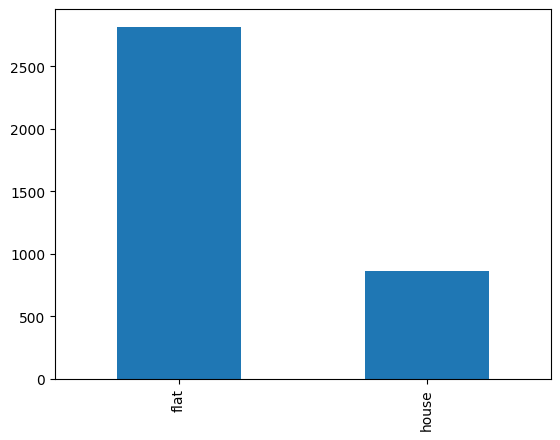

In [ ]:
df['property_type'].value_counts().plot(kind='bar')

**Observations**
* Flats are in majority(75 percent) and there are less number
* of houses(~25 percent)
* No missing values

### society

In [ ]:
df['society'].value_counts().shape

(675,)

In [ ]:
df['society'].value_counts()

independent                             486
tulip violet                             75
ss the leaf                              73
shapoorji pallonji joyville gurugram     42
dlf new town heights                     42
                                       ... 
dlf exclusive floors                      1
rk tower                                  1
dlf trinity towers                        1
ramson kshitij sec-95 gurugram            1
rajendra park gurgaon                     1
Name: society, Length: 675, dtype: int64

In [ ]:
df[df['society'] != 'independent']['society'].value_counts(normalize=True).cumsum().head(75)

tulip violet                            0.023518
ss the leaf                             0.046410
shapoorji pallonji joyville gurugram    0.059580
dlf new town heights                    0.072750
signature global park                   0.083725
                                          ...   
puri emerald bay                        0.490436
ats kocoon                              0.494512
indiabulls enigma                       0.498589
mvn athens                              0.502352
unitech uniworld resorts                0.506115
Name: society, Length: 75, dtype: float64

<Axes: >

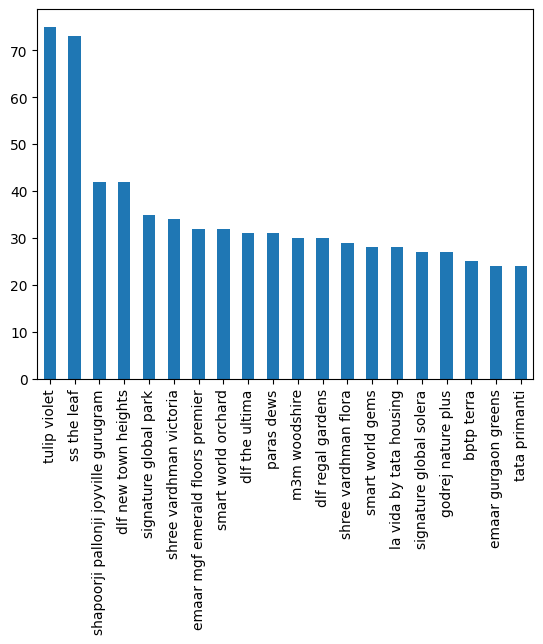

In [ ]:
df[df['society'] != 'independent']['society'].value_counts().head(20).plot(kind='bar')

In [ ]:
df['society'].isnull().sum()

0

**Observations**
1. Around 13% properties comes under independent tag.
There are 675 societies.
2. The top 75 societies have 50 percent of the preperties and the rest 50 percent of the properties come under the remaining 600 societies.
* Very High (>100): Only 1 society has more than 100 listings.
* High (50-100): 2 societies have between 50 to 100 listings.
* Average (10-49): 92 societies fall in this range with 10 to 49 listings each.
* Low (2-9): 273 societies have between 2 to 9 listings.
* Very Low (1): A significant number, 308 societies, have only 1 listing.

### sector

In [ ]:
# unique sectors
df['sector'].value_counts().shape

(114,)

<Axes: >

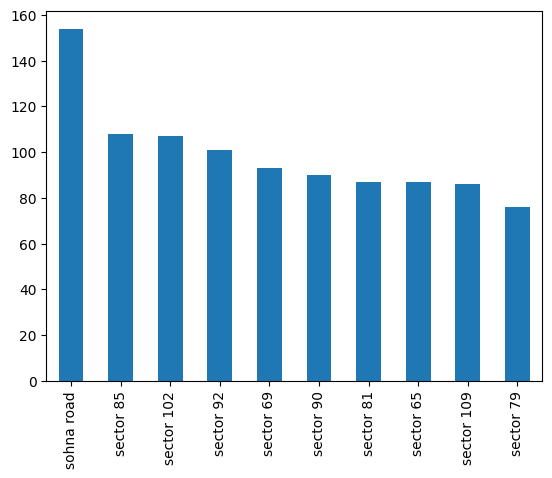

In [ ]:
# top 10 sectors
df['sector'].value_counts().head(10).plot(kind='bar')

In [ ]:
df['sector'].isnull().sum()

0

In [ ]:
# Frequency distribution for sectors
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

sector_frequency_bins

{'Very High (>100)': 4,
 'High (50-100)': 24,
 'Average (10-49)': 62,
 'Low (2-9)': 23,
 'Very Low (1)': 1}

**Observations**
1. There are a total of 114 unique sectors in the dataset.
Frequency distribution of sectors:
  * Very High (>100): 3 sectors have more than 100 listings.
  * High (50-100): 24 sectors have between 50 to 100 listings.
  * Average (10-49): A majority, 62 sectors, fall in this range with 10 to 49 listings each.
  * Low (2-9): 16 sectors have between 2 to 9 listings.
  * Very Low (1): Interestingly, there are no sectors with only 1 listing.

### Price

In [ ]:
df['price'].isnull().sum()

16

In [ ]:
df['price'].describe()

count    3659.000000
mean        2.534192
std         2.980859
min         0.070000
25%         0.950000
50%         1.520000
75%         2.750000
max        31.500000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

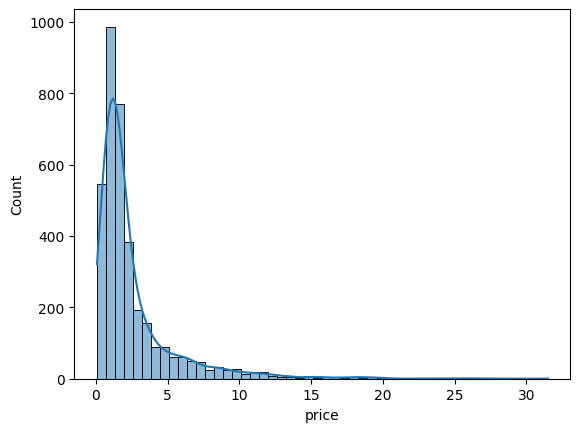

In [ ]:
sns.histplot(df['price'], kde=True, bins=50)

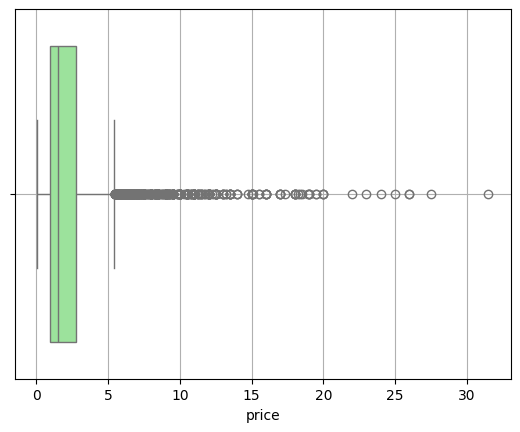

In [ ]:
sns.boxplot(x=df['price'], color='lightgreen')
plt.grid()

In [ ]:
df['price'].skew()

3.2788312777704673

**Descriptive Statistics:**

 * Count: There are 3,659 non-missing price entries.
 * Mean Price: The average price is approximately 2.53 crores.
 * Median Price: The median (or 50th percentile) price is 1.52 crores.
 * Standard Deviation: The prices have a standard deviation of 2.98, indicating variability in the prices.
 * Range: Prices range from a minimum of 0.07 crores to a maximum of 31.5 crores.
 * IQR: The interquartile range (difference between 75th and 25th percentile) is from 0.95 crores to 2.75 crores.

**Visualizations:**

Distribution: The histogram indicates that most properties are priced in the lower range (below 5 crores), with a few properties going beyond 10 crores.
Box Plot: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.
* Missing Values: There are 17 missing values in the price column.


* **Skewness:** The price distribution has a skewness of approximately 3.28, indicating a positive skew. This means that the distribution tail is skewed to the right, which aligns with our observation from the histogram where most properties have prices on the lower end with a few high-priced properties.

In [ ]:
quantiles = df['price'].quantile([0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99])

quantiles

0.01     0.250
0.05     0.370
0.25     0.940
0.50     1.500
0.75     2.700
0.95     8.490
0.99    15.017
Name: price, dtype: float64

* At the 0.01 quantile, the value is 0.01.
* At the 0.25 quantile, the value is 0.25.
* At the 0.95 quantile, the value is 8.490.
* At the 0.99 quantile, the value is 15.017.

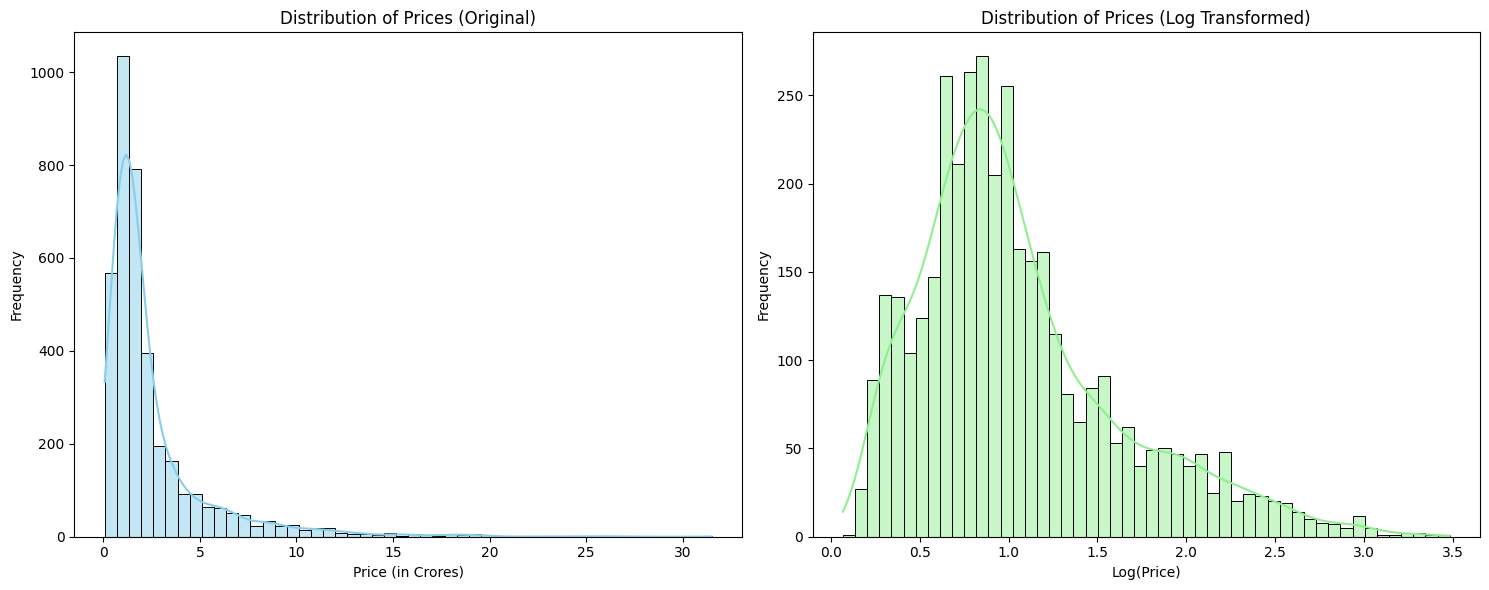

In [ ]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### price_per_sqft

In [ ]:
df['price_per_sqft'].isnull().sum()

17

In [ ]:
df['price_per_sqft'].describe()

count      3784.000000
mean      13802.839059
std       23054.466260
min           4.000000
25%        6810.250000
50%        9000.000000
75%       13766.000000
max      600000.000000
Name: price_per_sqft, dtype: float64

<Axes: xlabel='price_per_sqft', ylabel='Count'>

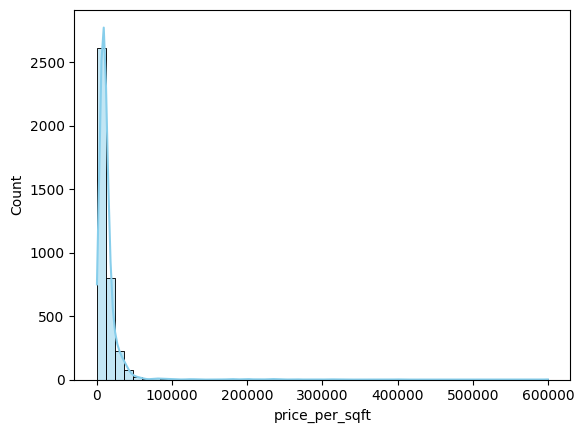

In [ ]:
sns.histplot(df['price_per_sqft'], bins=50, color='skyblue', kde=True)

<Axes: ylabel='price_per_sqft'>

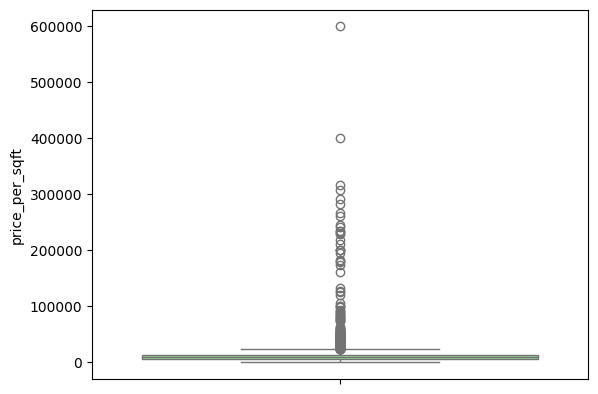

In [ ]:
sns.boxplot(df['price_per_sqft'], color='lightgreen')

**Observations**
* Potential Outliers
* Right Skewed
* 17 missing values

### bedRoom

In [ ]:
df['bedRoom'].isnull().sum()

0

<Axes: >

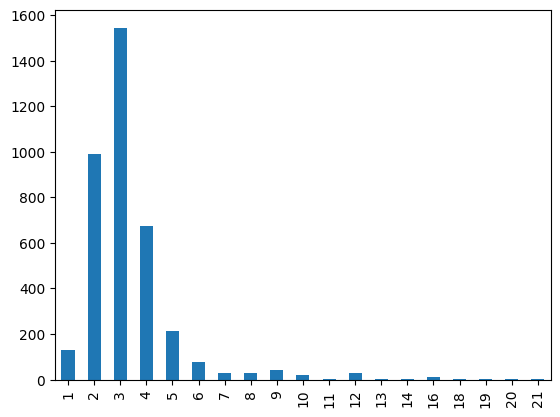

In [ ]:
df['bedRoom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='bedRoom'>

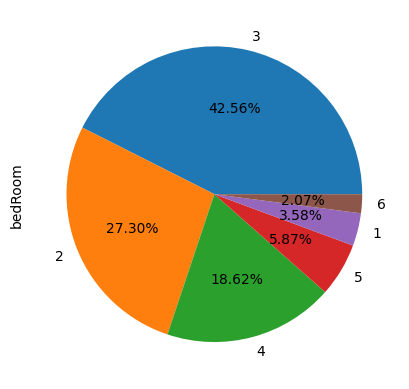

In [ ]:
df['bedRoom'].value_counts(normalize=True).head(6).plot(kind='pie',autopct='%0.2f%%')

### bathroom

In [ ]:
df['bathroom'].isnull().sum()

0

<Axes: >

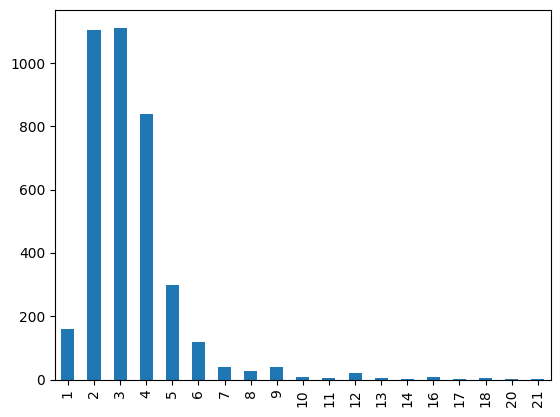

In [ ]:
df['bathroom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='bathroom'>

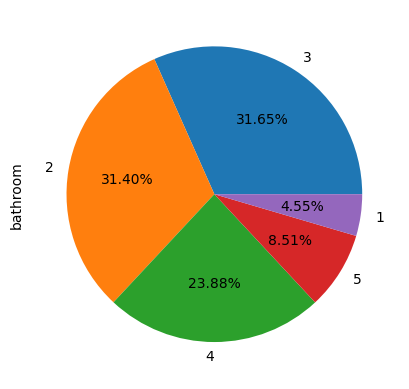

In [ ]:
df['bathroom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

### balcony

In [ ]:
df['balcony'].isnull().sum()

0

<Axes: >

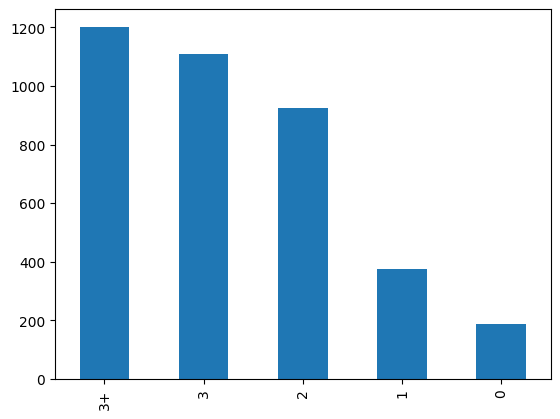

In [ ]:
df['balcony'].value_counts().plot(kind='bar')

<Axes: ylabel='balcony'>

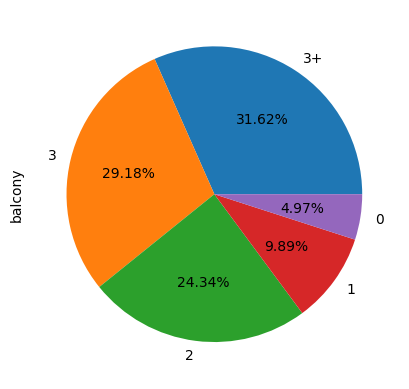

In [ ]:
df['balcony'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

### floornum

In [ ]:
df['floorNum'].isnull().sum()

17

In [ ]:
df['floorNum'].describe()

count    3784.000000
mean        6.808932
std         6.027184
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

<Axes: ylabel='floorNum'>

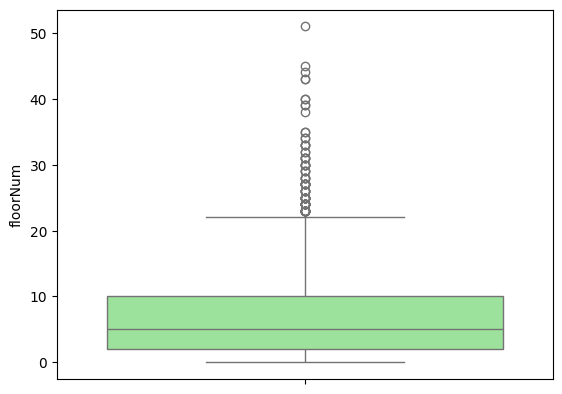

In [ ]:
sns.boxplot(df['floorNum'], color='lightgreen')

* The majority of the properties lie between the ground floor (0) and the 25th floor.
* Floors 1 to 4 are particularly common, with the 3rd floor being the most frequent.
* There are a few properties located at higher floors, but their frequency is much lower.


### facing

In [ ]:
df['facing'].isnull().sum()

258

In [ ]:
df['facing'].fillna('NA',inplace=True)

In [ ]:
df['facing'].value_counts()

Na            846
East          641
North-East    639
North         398
NA            258
West          255
South         233
North-West    200
South-East    174
South-West    157
Name: facing, dtype: int64

### AgePossession

In [ ]:
df['agePossession'].isnull().sum()

0

In [ ]:
df['agePossession'].value_counts()

Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     281
Name: agePossession, dtype: int64

### Areas

In [ ]:
# super built up area
df['super_built_up_area'].isnull().sum()

1352

In [ ]:
df['super_built_up_area'].describe()

count      2449.000000
mean       2147.299939
std        4733.414385
min          50.000000
25%        1440.000000
50%        1850.000000
75%        2383.000000
max      215517.000000
Name: super_built_up_area, dtype: float64

<Axes: xlabel='super_built_up_area', ylabel='Count'>

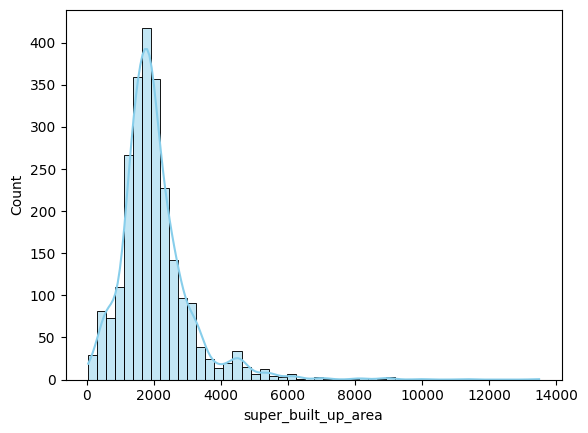

In [ ]:
sns.histplot(df['super_built_up_area'].dropna(), bins=50, color='skyblue', kde=True)

In [ ]:
df[df['super_built_up_area']>50000]

,property_type,society,sector,price,price_per_sqft,area,bedRoom,bathroom,balcony,floorNum,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,Wardrobe,furnishing_type,luxury_score


In [ ]:
df.drop(index=[2055,2980],inplace=True)

In [ ]:
# built up area
df['built_up_area'].isnull().sum()

2613

In [ ]:
df['built_up_area'].describe()

count      1186.000000
mean       2405.914932
std       21391.176759
min          30.000000
25%        1121.250000
50%        1600.000000
75%        2060.000000
max      737147.000000
Name: built_up_area, dtype: float64

<Axes: xlabel='built_up_area', ylabel='Count'>

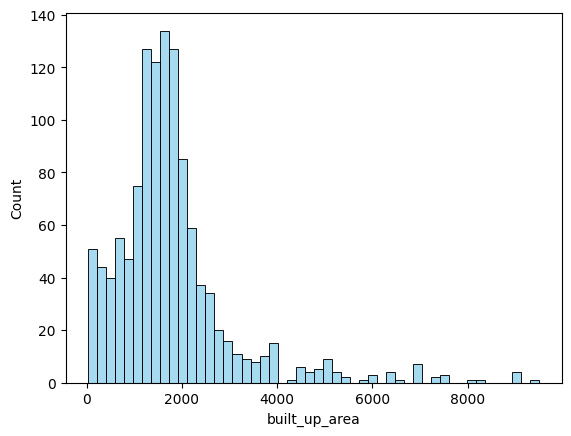

In [ ]:
sns.histplot(df['built_up_area'].dropna(), bins=50, color='skyblue', kde=False)

In [ ]:
df[df['built_up_area']>100000]

,property_type,society,sector,price,price_per_sqft,area,bedRoom,bathroom,balcony,floorNum,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,Wardrobe,furnishing_type,luxury_score
3679,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,2,2,2,8.0,...,737147.0,NaN,0,0,0,0,0,1,2,44


In [ ]:
df.drop(index=[3679],inplace=True)

### additional rooms

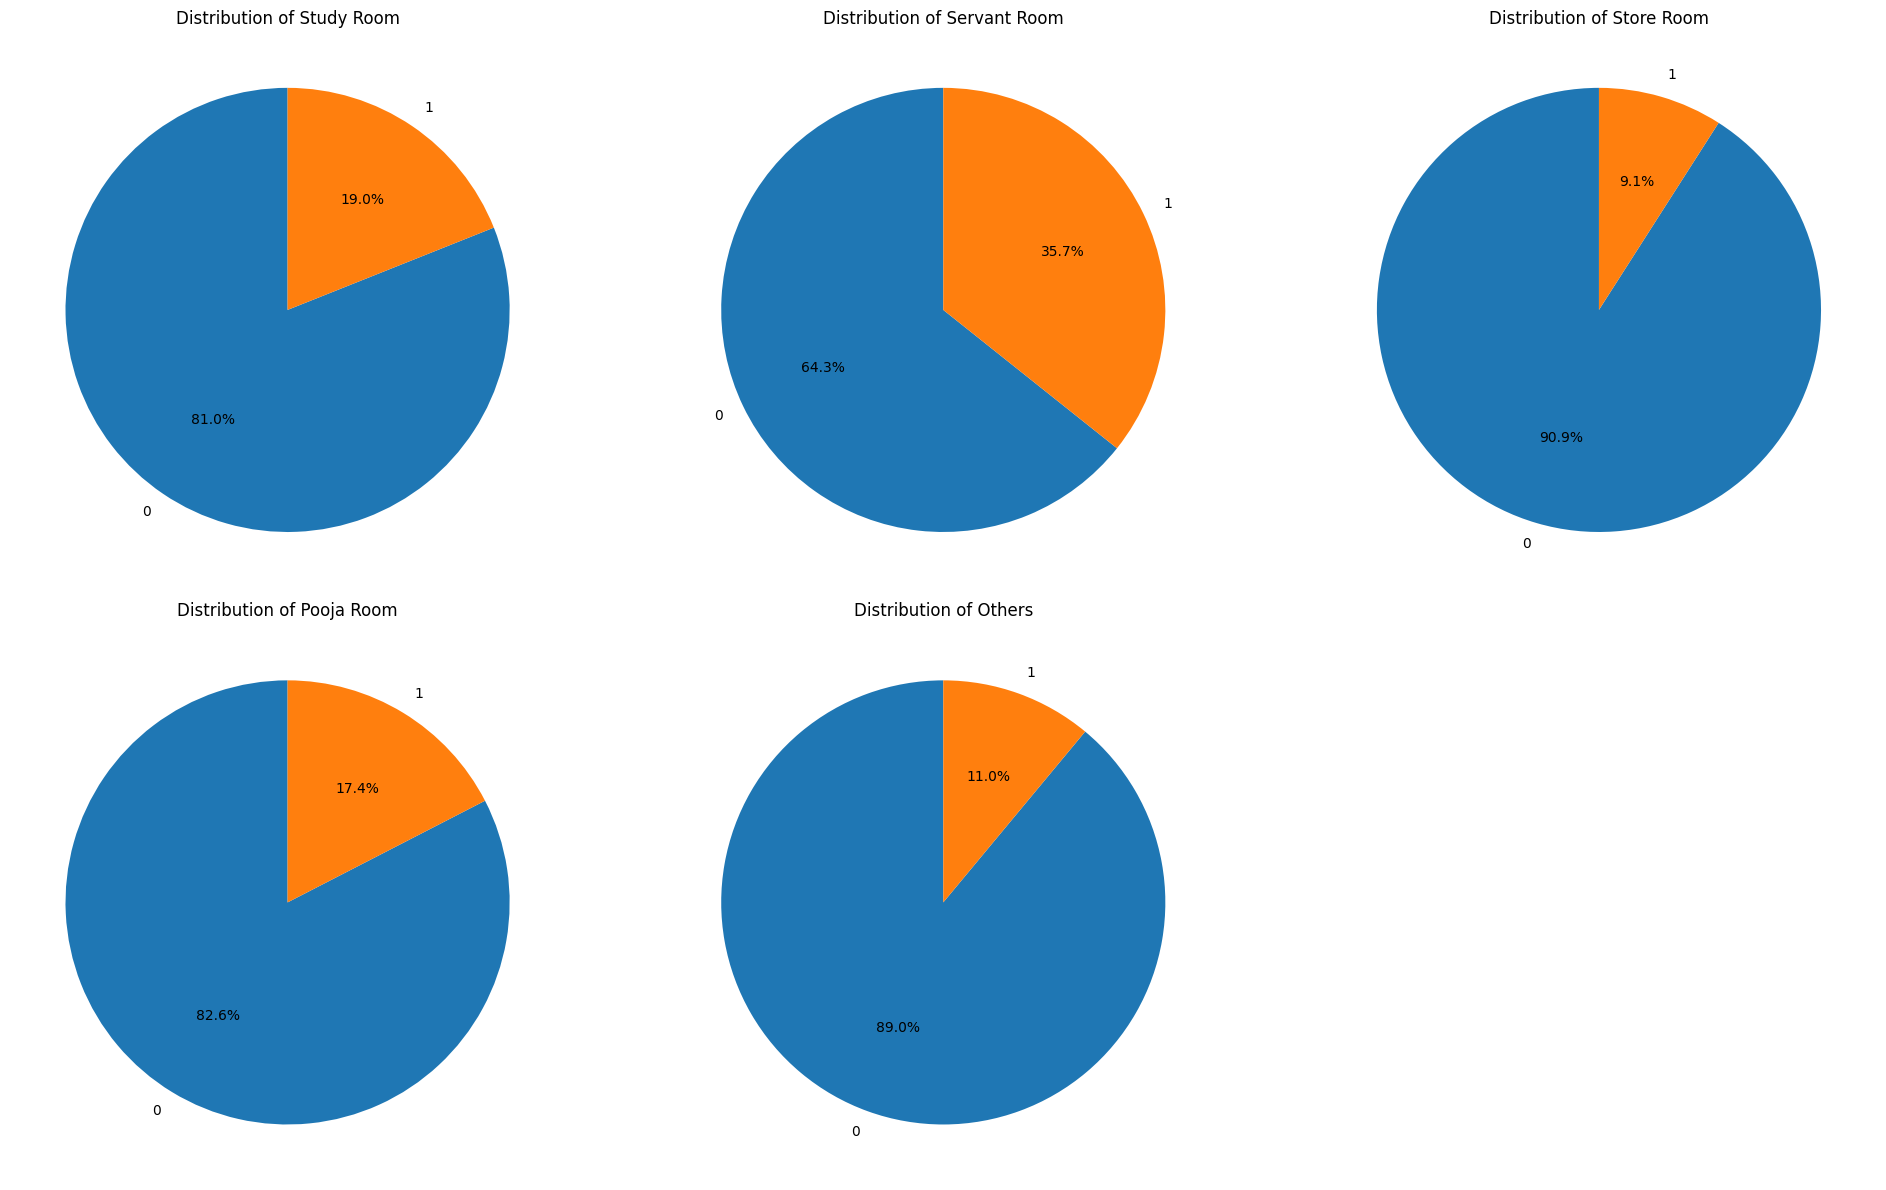

In [ ]:
plt.figure(figsize=(20, 12))

# Create a subplot of pie charts for each room type
for idx, room in enumerate(['study room','servant room','store room','pooja room','others'], 1):
    ax = plt.subplot(2, 3, idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

### furnishing type

In [ ]:
df['furnishing_type'].value_counts()

0    2418
1    1163
2     217
Name: furnishing_type, dtype: int64

<Axes: ylabel='furnishing_type'>

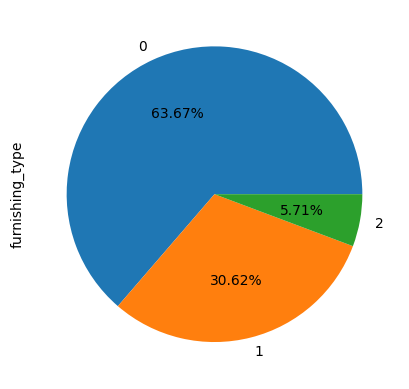

In [ ]:
df['furnishing_type'].value_counts().plot(kind='pie',autopct='%0.2f%%')

### luxury score

In [ ]:
df['luxury_score'].isnull().sum()

0

In [ ]:
df['luxury_score'].describe()

count    3798.000000
mean       71.000527
std        52.816716
min         0.000000
25%        31.000000
50%        58.000000
75%       109.000000
max       174.000000
Name: luxury_score, dtype: float64

<Axes: xlabel='luxury_score', ylabel='Count'>

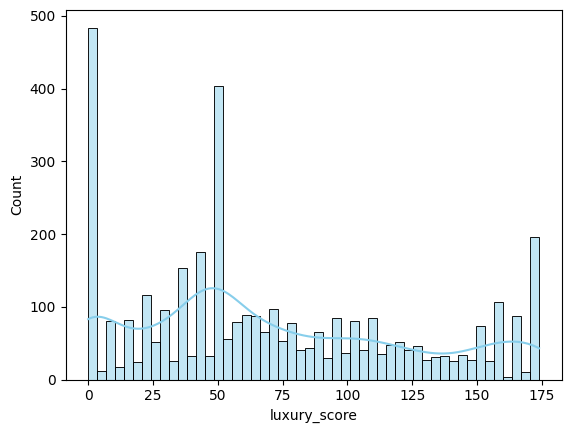

In [ ]:
sns.histplot(df['luxury_score'], bins=50, color='skyblue', kde=True)

In [ ]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,bedRoom,bathroom,balcony,floorNum,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,Wardrobe,furnishing_type,luxury_score
0,flat,ashiana apartment,sector 23,0.16,2051.0,780.0,2,2,2,1.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,house,independent,sector 39,1.80,21875.0,823.0,1,1,2,3.0,...,800.0,720.0,0,0,0,0,0,0,0,0
2,house,vipul tatvam villa,sector 48,7.35,22812.0,3222.0,4,5,2,2.0,...,NaN,NaN,1,1,1,1,0,4,1,144
3,flat,mapsko casa bella,sector 82,3.00,6134.0,4891.0,4,6,3+,25.0,...,NaN,NaN,0,1,0,1,0,0,1,119
4,flat,ansal heights 86,sector 86,0.64,4706.0,1360.0,2,2,1,3.0,...,1360.0,NaN,0,0,0,0,0,0,0,73
